# AIDM7330 Basic Programming for Data Science

# Python Web Scraping Using BeautifulSoup

Parts of this code example is compiled by He Can (ITM@HKBU), and referred from the tutorial compiled by Alexander Fred Ojala, from https://www.crummy.com/software/BeautifulSoup/bs4/doc/ & https://www.dataquest.io/blog/web-scraping-tutorial-python/

In this tutorial, you will learn how to perform web scraping using Python 3 and the `BeautifulSoup` library. We’ll be scraping weather forecasts from the [National Weather Service](https://www.weather.gov/), and then store data using the Pandas library.

In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

The `requests` library will make a `GET` request to a web server, which will download the HTML contents of a given web page for us.  
After running our request, we get a `Response` object. This object has a `status_code` attribute, 200 indicates the page was downloaded successfully

In [2]:
url = 'https://forecast.weather.gov/MapClick.php?lat=37.7772&lon=-122.4168'
page = requests.get(url)
page

<Response [200]>

We can print out the HTML content of the page using the `content` attribute:

In [3]:
page.content

b'<!DOCTYPE html>\n<html class="no-js">\n    <head>\n        <!-- Meta -->\n        <meta name="viewport" content="width=device-width">\n        <link rel="schema.DC" href="http://purl.org/dc/elements/1.1/" /><title>National Weather Service</title><meta name="DC.title" content="National Weather Service" /><meta name="DC.description" content="NOAA National Weather Service National Weather Service" /><meta name="DC.creator" content="US Department of Commerce, NOAA, National Weather Service" /><meta name="DC.date.created" scheme="ISO8601" content="" /><meta name="DC.language" scheme="DCTERMS.RFC1766" content="EN-US" /><meta name="DC.keywords" content="weather, National Weather Service" /><meta name="DC.publisher" content="NOAA\'s National Weather Service" /><meta name="DC.contributor" content="National Weather Service" /><meta name="DC.rights" content="//www.weather.gov/disclaimer.php" /><meta name="rating" content="General" /><meta name="robots" content="index,follow" />\n\n        <!-- 

### Parsing a page with BeautifulSoup


In [4]:
soup = BeautifulSoup(page.content, 'html.parser')

## Exploring page structure with Chrome DevTools
We’ll extract weather information about downtown San Francisco from [this page](http://forecast.weather.gov/MapClick.php?lat=37.7772&lon=-122.4168).  
The first thing we’ll need to do is inspect the page using Chrome developer tools. Start the developer tools in Chrome by clicking `View` -> `Developer` -> `Developer Tools`  
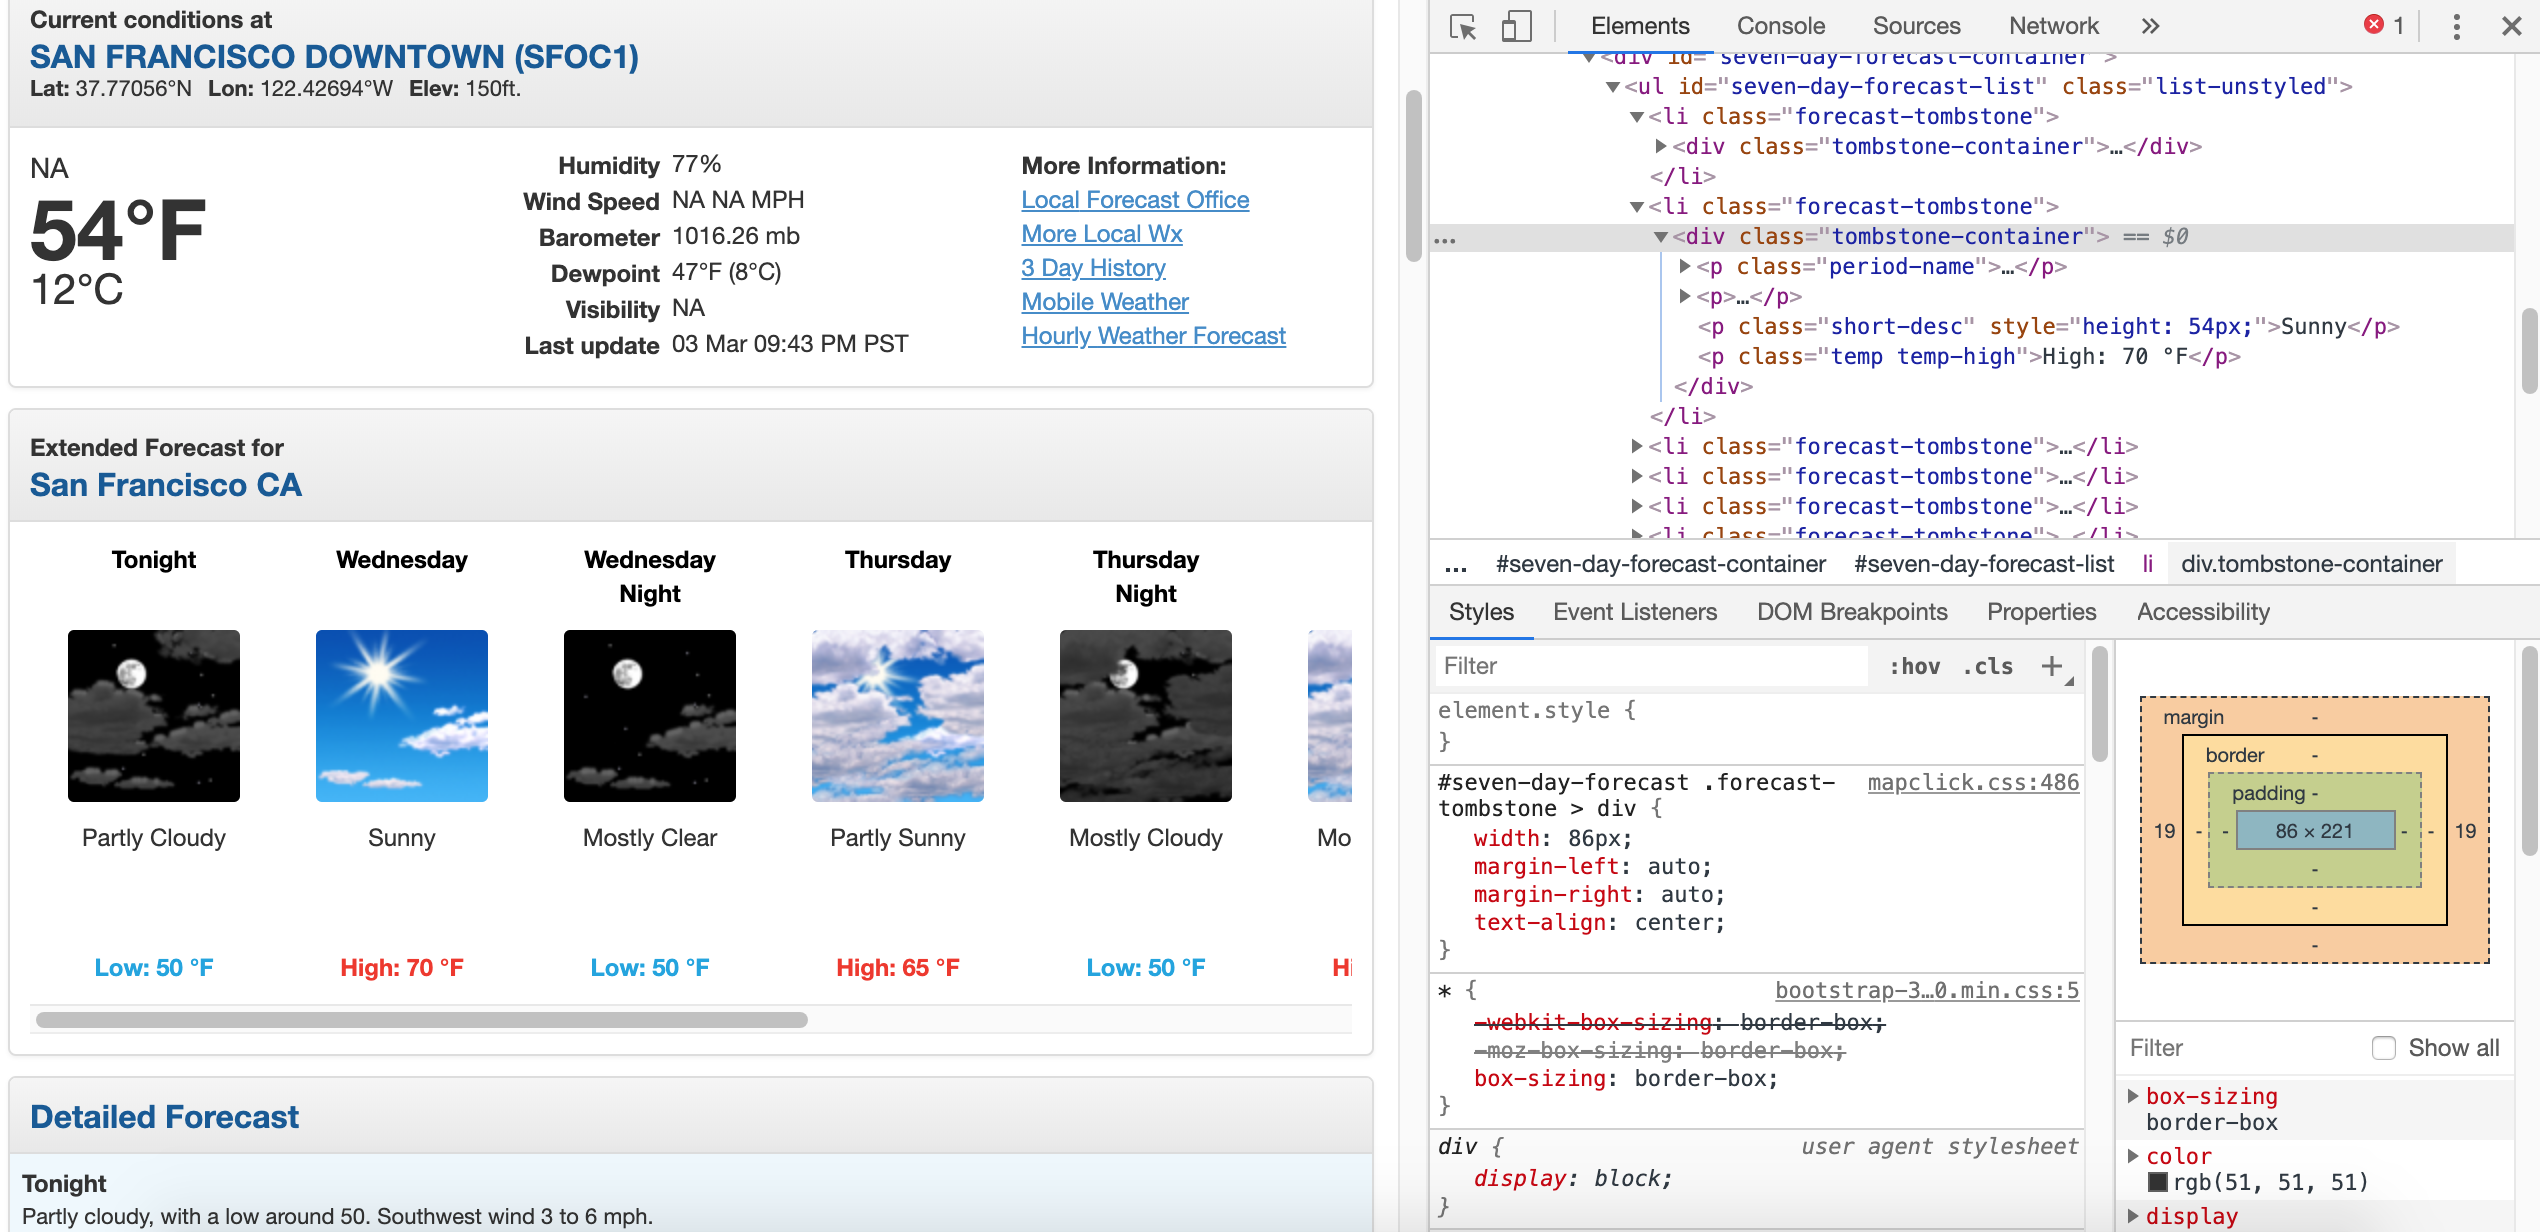

### Finding all instances of a tag at once
If we want to extract a single tag, we use the `find_all` method, which will find all the instances of a tag on a page.

In [5]:
soup.find_all('title')

[<title>National Weather Service</title>]

In [6]:
soup.find_all('h2')

[<h2 class="panel-title">SAN FRANCISCO DOWNTOWN (SFOC1)</h2>,
 <h2 class="panel-title">
                 San Francisco CA    </h2>,
 <h2 class="panel-title">Detailed Forecast</h2>,
 <h2 class="panel-title">Additional Forecasts and Information</h2>,
 <h2 class="panel-title">Additional Resources</h2>]

If you instead only want to find the first instance of a tag, you can use the `find` method

In [7]:
soup.find('h2')

<h2 class="panel-title">SAN FRANCISCO DOWNTOWN (SFOC1)</h2>

### Structure of  Extended Forecast
By right clicking on the page near where it says “Extended Forecast”, then clicking “Inspect”, we’ll open up the tag that contains the text “Extended Forecast” in the elements panel.  
The `div` contains the extended forecast items.
If you explore the div, you’ll discover that each forecast item (like “Tonight”, “Thursday”, and “Thursday Night”) is contained in a div with the class `tombstone-container`.
<img src="../figures/inspect.png" alt="drawing" width="550"/>

In the below code, we:
- Download the web page containing the forecast.
- Create a BeautifulSoup class to parse the page.
- Find the div with id `seven-day-forecast`, and assign to variable seven_day
- Inside seven_day, find each individual forecast item.
- Extract and print the first forecast item.

In [8]:
# Function for data cleaning
# Remove extra events, keep only the day by day forecast

def remove_extra_events(event_list):
    if len(event_list)>8:
        event_list.pop(0)
    return event_list

In [9]:
# Download and parse the web page
page = requests.get("http://forecast.weather.gov/MapClick.php?lat=37.7772&lon=-122.4168")
soup = BeautifulSoup(page.content, 'html.parser')

seven_day = soup.find(id="seven-day-forecast") # Find seven-day-forecast
scraped_items = seven_day.find_all(class_="tombstone-container") # Scrape the specific container
forecast_items = remove_extra_events(scraped_items) # Clean data from extra events
tonight = forecast_items[0] # Extract 1st forecast
print(tonight.prettify())
# tonight

<div class="tombstone-container">
 <p class="period-name">
  Tonight
  <br/>
  <br/>
 </p>
 <p>
  <img alt="Tonight: Increasing clouds, with a low around 57. West wind around 7 mph. " class="forecast-icon" src="newimages/medium/nbkn.png" title="Tonight: Increasing clouds, with a low around 57. West wind around 7 mph. "/>
 </p>
 <p class="short-desc">
  Increasing
  <br/>
  Clouds
 </p>
 <p class="temp temp-low">
  Low: 57 °F
 </p>
</div>


In [10]:
# print every forecast item
for item in forecast_items:
    print(item.prettify(), '\n')

<div class="tombstone-container">
 <p class="period-name">
  Tonight
  <br/>
  <br/>
 </p>
 <p>
  <img alt="Tonight: Increasing clouds, with a low around 57. West wind around 7 mph. " class="forecast-icon" src="newimages/medium/nbkn.png" title="Tonight: Increasing clouds, with a low around 57. West wind around 7 mph. "/>
 </p>
 <p class="short-desc">
  Increasing
  <br/>
  Clouds
 </p>
 <p class="temp temp-low">
  Low: 57 °F
 </p>
</div> 

<div class="tombstone-container">
 <p class="period-name">
  Saturday
  <br/>
  <br/>
 </p>
 <p>
  <img alt="Saturday: Partly sunny, with a high near 69. West wind 5 to 8 mph. " class="forecast-icon" src="newimages/medium/bkn.png" title="Saturday: Partly sunny, with a high near 69. West wind 5 to 8 mph. "/>
 </p>
 <p class="short-desc">
  Partly Sunny
 </p>
 <p class="temp temp-high">
  High: 69 °F
 </p>
</div> 

<div class="tombstone-container">
 <p class="period-name">
  Saturday
  <br/>
  Night
 </p>
 <p>
  <img alt="Saturday Night: A 40 percent c

## Extracting information from the page
As you can see, inside the forecast item `tonight` (variable) is all the information we want. There are 4 pieces of information we can extract:
- The name of the forecast item
- The description of the conditions — this is stored in the title property of img.
- A short description of the conditions
- The temperature low/high

In [11]:
# extract the name of the forecast item, the short description, and the temperature
period = tonight.find(class_="period-name").get_text()
short_desc = tonight.find(class_="short-desc").get_text()
temp = tonight.find(class_="temp").get_text()
print(period)
print(short_desc)
print(temp)

Tonight
IncreasingClouds
Low: 57 °F


We can extract the `title` attribute from the *img* tag. To do this, we just treat the variable `img` like a <span style="color:orange">dictionary</span>, and extract the attribute we want as a key

In [12]:
# extract a short description of the conditions
img = tonight.find("img")
desc = img['title']
print(desc)

Tonight: Increasing clouds, with a low around 57. West wind around 7 mph. 


In [13]:
img

<img alt="Tonight: Increasing clouds, with a low around 57. West wind around 7 mph. " class="forecast-icon" src="newimages/medium/nbkn.png" title="Tonight: Increasing clouds, with a low around 57. West wind around 7 mph. "/>

## Extracting all the information from the page
Here, we search for items using CSS selectors [(more about CSS selectors)](https://www.htmldog.com/guides/css/intermediate/classid/).
- Select all items with the class `period-name` inside an item with the class `tombstone-container` in seven_day.
- Use a for loop to append every period time to a list.

In [14]:
scraped_tags = seven_day.select(".tombstone-container .period-name")
period_tags = remove_extra_events(scraped_tags)
periods = []
for pt in period_tags:
    periods.append(pt.get_text())
periods

['Tonight',
 'Saturday',
 'SaturdayNight',
 'Sunday',
 'SundayNight',
 'Monday',
 'MondayNight',
 'Tuesday']

Apply the same technique to get the other `3` fields

In [15]:
short_descs = []
temps = []
descs = []

# Scrape the specific containers and clean the data
scraped_sd = seven_day.select(".tombstone-container .short-desc")
clean_sd = remove_extra_events(scraped_sd)
scraped_temp = seven_day.select(".tombstone-container .temp")
clean_temp = remove_extra_events(scraped_temp)
scraped_img = seven_day.select(".tombstone-container img")
clean_img = remove_extra_events(scraped_img)

# Create individual lists for each element
for sd in clean_sd:
    short_descs.append(sd.get_text())
for temp in clean_temp:
    temps.append(temp.get_text())
for img in clean_img:
    descs.append(img['title'])

print(short_descs)
print(temps)
print(descs)

print('##############################')

print(len(short_descs))
print(len(temps))
print(len(descs))

['IncreasingClouds', 'Partly Sunny', 'Chance Rain', 'Chance Rain', 'Chance Rain', 'Rain Likely', 'Chance Rain', 'Chance Rain']
['Low: 57 °F', 'High: 69 °F', 'Low: 57 °F', 'High: 68 °F', 'Low: 56 °F', 'High: 66 °F', 'Low: 53 °F', 'High: 65 °F']
['Tonight: Increasing clouds, with a low around 57. West wind around 7 mph. ', 'Saturday: Partly sunny, with a high near 69. West wind 5 to 8 mph. ', 'Saturday Night: A 40 percent chance of rain.  Mostly cloudy, with a low around 57. West southwest wind 5 to 9 mph. ', 'Sunday: A 50 percent chance of rain.  Mostly cloudy, with a high near 68. South wind 3 to 8 mph.  New precipitation amounts of less than a tenth of an inch possible. ', 'Sunday Night: A 40 percent chance of rain.  Mostly cloudy, with a low around 56. New precipitation amounts of less than a tenth of an inch possible. ', 'Monday: Rain likely.  Mostly cloudy, with a high near 66. Chance of precipitation is 60%.', 'Monday Night: A chance of rain.  Mostly cloudy, with a low around 53.'

### "one-liner"
Alternative way to fill the lists (for reference)

In [16]:
day_ol = [d.text for d in seven_day.find_all(class_='period-name')]
temp_ol = [temp.text for temp in seven_day.find_all(class_='temp')]

In [17]:
# Find all the images
desc_ol = seven_day.find_all('img')
# Extract weather description
desc_list=list()
for txt in desc_ol:
    desc_list.append(txt.get('alt'))
print(desc_list)

['Today: Sunny, with a high near 74. Calm wind becoming west 5 to 8 mph in the afternoon. ', 'Tonight: Increasing clouds, with a low around 57. West wind around 7 mph. ', 'Saturday: Partly sunny, with a high near 69. West wind 5 to 8 mph. ', 'Saturday Night: A 40 percent chance of rain.  Mostly cloudy, with a low around 57. West southwest wind 5 to 9 mph. ', 'Sunday: A 50 percent chance of rain.  Mostly cloudy, with a high near 68. South wind 3 to 8 mph.  New precipitation amounts of less than a tenth of an inch possible. ', 'Sunday Night: A 40 percent chance of rain.  Mostly cloudy, with a low around 56. New precipitation amounts of less than a tenth of an inch possible. ', 'Monday: Rain likely.  Mostly cloudy, with a high near 66. Chance of precipitation is 60%.', 'Monday Night: A chance of rain.  Mostly cloudy, with a low around 53.', 'Tuesday: A chance of rain.  Partly sunny, with a high near 65.']


## Exercise

Convert the previous code to one-liner!

## Combining our data into a Pandas Dataframe
We pass `4` lists into `pd.DataFrame` as part of a dictionary. Each dictionary key will become a column in the DataFrame, and each list will become the values in the column

In [18]:
# create a dataframe
weather = pd.DataFrame({
    "period": periods,
    "short_desc": short_descs,
    "temp": temps,
    "desc":descs
})
weather

,period,short_desc,temp,desc
0,Tonight,IncreasingClouds,Low: 57 °F,"Tonight: Increasing clouds, with a low around ..."
1,Saturday,Partly Sunny,High: 69 °F,"Saturday: Partly sunny, with a high near 69. W..."
2,SaturdayNight,Chance Rain,Low: 57 °F,Saturday Night: A 40 percent chance of rain. ...
3,Sunday,Chance Rain,High: 68 °F,Sunday: A 50 percent chance of rain. Mostly c...
4,SundayNight,Chance Rain,Low: 56 °F,Sunday Night: A 40 percent chance of rain. Mo...
5,Monday,Rain Likely,High: 66 °F,"Monday: Rain likely. Mostly cloudy, with a hi..."
6,MondayNight,Chance Rain,Low: 53 °F,Monday Night: A chance of rain. Mostly cloudy...
7,Tuesday,Chance Rain,High: 65 °F,"Tuesday: A chance of rain. Partly sunny, with..."


Save the dataframe to a `csv` file.

First we need to connect to your Google Drive account.

For security reasons, you will be requested to grant permission to Google Colab to access your Google Drive. Please allow the operation by selecting the correct account where you store your Colab Notebooks.

In [19]:
from google.colab import drive
drivePath = '/content/drive' #please do not change
drive.mount(drivePath)

Mounted at /content/drive


Now we can select the correct directory in your Google drive.

In [20]:
#path to data directory
dataPath = drivePath + '/MyDrive/Colab Notebooks/data' + "/"

We will also check if the directory is present, creating a new one if needed.

In [21]:
import os, pathlib
if not(os.path.exists(dataPath)):
  # os.mkdir(dataPath) # Creates only the last directory if missing. Rises error if it exists
  path = pathlib.Path(dataPath)
  path.mkdir(parents=True, exist_ok=True) # Can create the folders in the path if missing. No error if path exists
  print('Path has been created')
else:
  print('The data path you selected already exists')

The data path you selected already exists


In [22]:
weather.to_csv(dataPath + 'weather.csv')

## Assignment:
1. Try to harvest the historical weather trend from the Hong Kong Observatory (https://www.hko.gov.hk/en/cis/normal/1981_2010/dnormal10.htm#)

2. For (1), how to harvest all the monthly data from different months and different years?

# Acknowledgements

- The code in this notebook are modified from Dr. Xinzhi Zhang teaching material and other various sources. All codes are for educational purposes only and released under the CC1.0.